## **Import Dependancies**

In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import gzip
import numpy as np
import struct
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

2024-11-12 11:34:50.138018: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 11:34:50.453708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731400490.583131  128705 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731400490.618283  128705 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 11:34:50.964189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In order for the code's behavior to be predictable and repeatable, which is especially important for debugging and comparing results.

## **Data Loading**

### **Function to extract images**

In [2]:
def extract_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)
    return images

### **Function to extract labels**

In [3]:
def extract_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

### **Extract and load the dataset**

In [4]:
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

train_images = extract_images(train_images_path)
train_labels = extract_labels(train_labels_path)
test_images = extract_images(test_images_path)
test_labels = extract_labels(test_labels_path)

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images.shape,  test_labels.shape

((10000, 28, 28), (10000,))

In [7]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## **Labels**

Each training and test images is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

## **Exploratory Data Analysis**

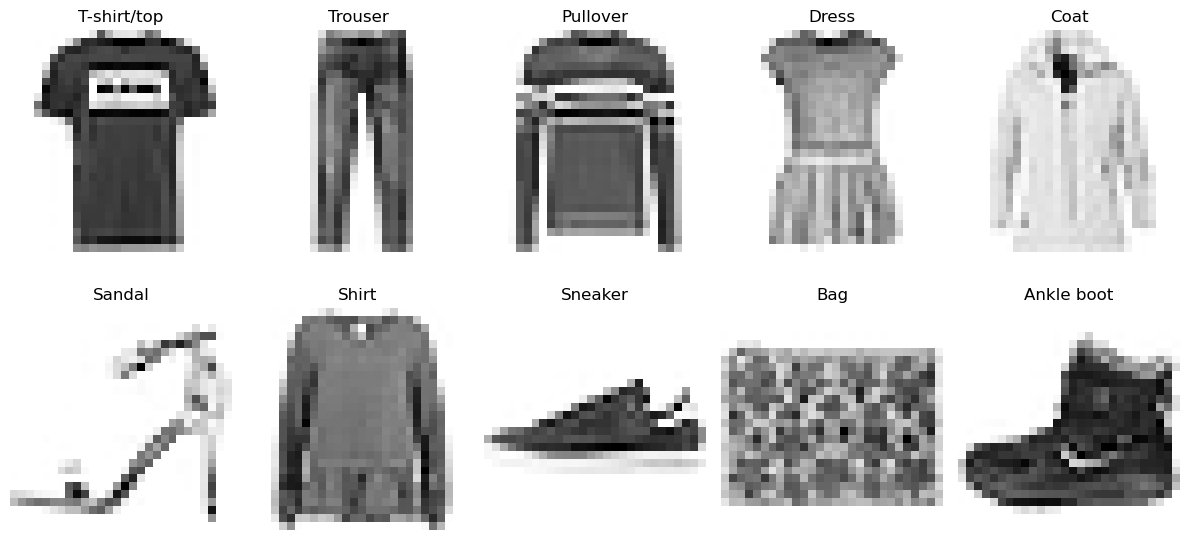

In [8]:
# Define the label names
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Create a figure to display images in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Find and plot one example of each label
for i in range(10):
    ax = axes[i // 5, i % 5]  # Determine the subplot index
    label_index = np.where(train_labels == i)[0][0]  # Find the first instance of each label
    ax.imshow(train_images[label_index], cmap="Greys")
    ax.set_title(label_names[i])
    ax.axis('off')

# Display the grid
plt.tight_layout()
plt.show();

## **Data Processing**

### **Feature Scaling**

In [9]:
# Normalize pixel values 
train_images = train_images / 255.0 
test_images = test_images / 255.0

### **Re-Sizing**

In [10]:
# Reshape for CNN 
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) 
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

### **Split Data Set**

In [11]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=34)

In [12]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [13]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

## **Model Selection - CNN**

In [14]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid", activation="relu", input_shape=[28, 28, 1]),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-12 11:34:58.640665: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Train Model**

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6974 - loss: 0.9654 - val_accuracy: 0.8486 - val_loss: 0.4247
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8642 - loss: 0.3938 - val_accuracy: 0.8661 - val_loss: 0.3749
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8817 - loss: 0.3397 - val_accuracy: 0.8812 - val_loss: 0.3347
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8926 - loss: 0.3088 - val_accuracy: 0.8896 - val_loss: 0.3157
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8998 - loss: 0.2858 - val_accuracy: 0.8932 - val_loss: 0.3044
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9056 - loss: 0.2677 - val_accuracy: 0.8966 - val_loss: 0.2964
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9102 - loss: 0.2524 - val_accuracy: 0.8959 - val_loss: 0.2908
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9148 - loss: 0.2391 - val_accuracy: 0.8975 - v

## **Test Model**

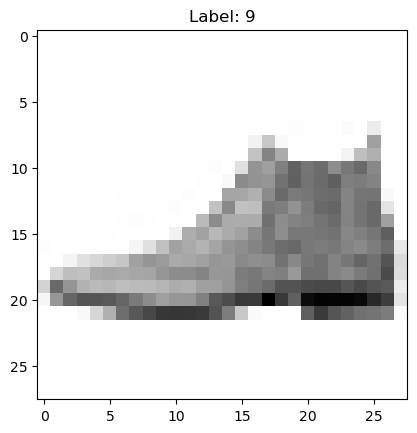

In [18]:
# Display the test image
plt.imshow(test_images[0], cmap="Greys")
plt.title(f"Label: {test_labels[0]}")
plt.show()

In [19]:
label = np.argmax(model.predict(np.expand_dims(test_images[0], axis=0)).round(2))
print("The label number is ", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The label number is  9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


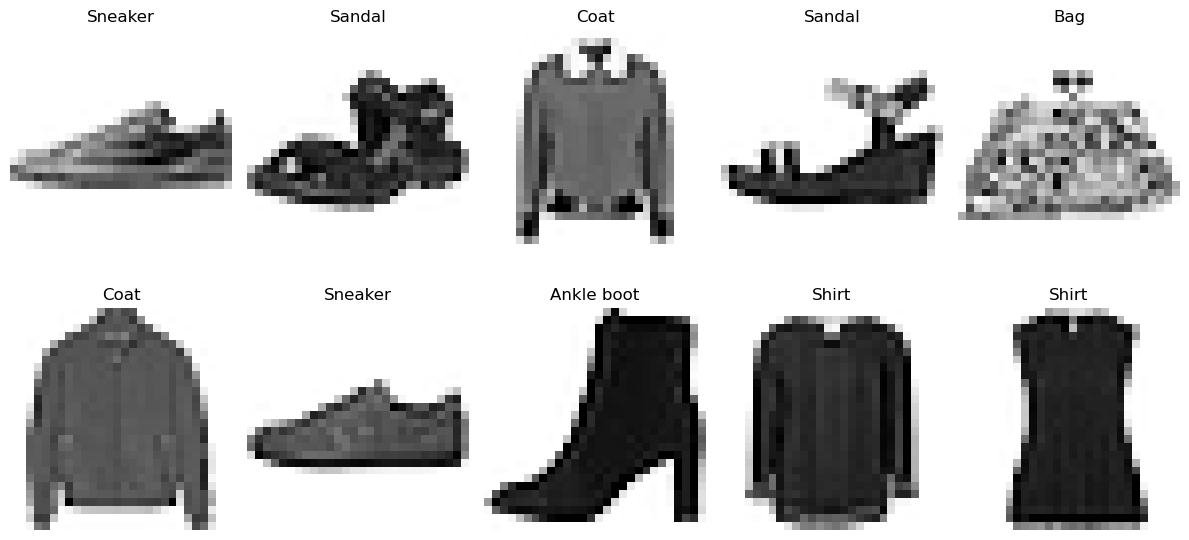

In [20]:
# Create a figure to display images in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# Select 10 random indices
random_indices = np.random.choice(test_images.shape[0], 10, replace=False)

# Plot the images and their predicted labels
for i, idx in enumerate(random_indices):
    ax = axes[i // 5, i % 5]
    ax.imshow(test_images[idx].reshape(28, 28), cmap="Greys")
    label = np.argmax(model.predict(np.expand_dims(test_images[idx], axis=0)).round(2))
    ax.set_title(label_names[label])
    ax.axis('off')

# Display the grid
plt.tight_layout()
plt.show()

## **Evaluate Model**

In [21]:
y_pred = model.predict(test_images).round(2)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.03, 0.  ]], dtype=float32)

In [22]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9031 - loss: 0.2820


[0.2831084132194519, 0.899399995803833]

In [23]:
# # Plot training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

NameError: name 'history' is not defined

In [24]:
# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

## **Confussion Matrics**

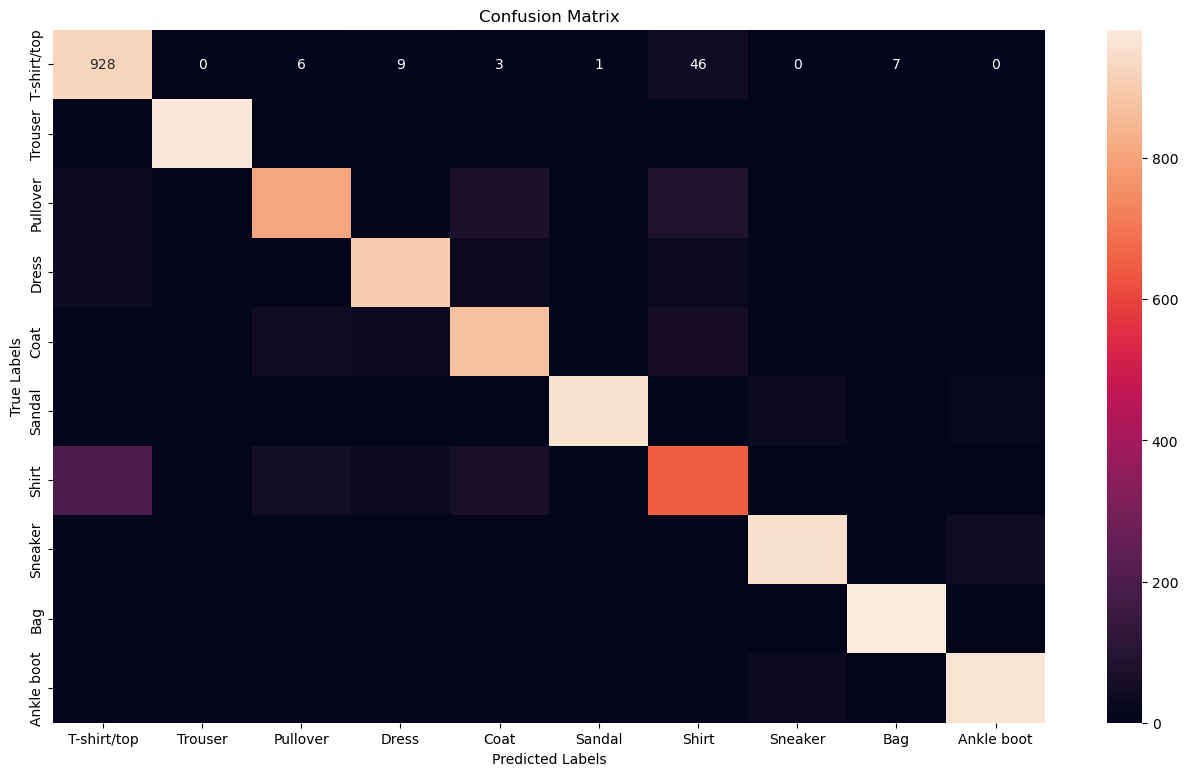

In [25]:
y_pred_labels = [np.argmax(label) for label in y_pred]

# Create the confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(16, 9))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
cr = classification_report(test_labels, y_pred_labels, target_names=label_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.93      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.81      0.84      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.84      0.87      0.86      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.75      0.65      0.70      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## **Save Model**

In [27]:
# Save the model using the native Keras format
model.save('./model/trained_fashion_mnist_model.keras')

## **Model Deployment**

In [34]:
# Dependancies
# ! pip install rembg

In [ ]:
# Remove background-image
from rembg import remove
from PIL import Image

img = Image.open("test/test1.jpeg")
R = remove(img)
R.save("img1.png")

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 81.0GB/s]


In [28]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Load the image
image_path = "test/test1.jpeg"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28 pixels

# Convert the image to a numpy array and normalize pixel values
image_array = np.array(image) / 255.0

# Expand dimensions to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=(0, -1))

# Predict the label
label = np.argmax(model.predict(image_array).round(2))
print("The label number is", label)

# Print the corresponding label name
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("The predicted label is", label_names[label])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The label number is 8
The predicted label is Bag
